# First variable selection

###  Read clean data

In [1]:
import pandas as pd

# Specify the path to your CSV file
file_path = 'Group_2_clean_Data..csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

df.head()


,communityname,State,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,149.0,28.0,55.0,509.0,1.0,11980.0,3.10,1.37,91.78,6.50,...,14.1,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,1034.0,35.0,58.0,424.0,1.0,23123.0,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,1780.0,34.0,114.0,959.0,1.0,29344.0,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,664.0,31.0,53.0,213.0,1.0,16656.0,2.40,1.70,97.35,0.50,...,225.0,1301.78,716.0,4142.56,47.0,271.93,5.0,21.08,306.64,4425.45
4,140.0,22.0,82.0,471.0,1.0,11245.0,2.76,0.53,89.16,1.17,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,374.06,9988.79


In [2]:
# Assuming `df` is your DataFrame:
df_feature = df.iloc[:, 5:-18]  # Select all rows and columns from index 5 to the 18th-to-last
df_target = df['burglaries']  # Select the 'violentPerPop' column as the target variable


df_feature.head(5)


,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,...,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,landArea,popDensity,pctUsePubTrans,pctOfficDrugUnit
0,11980.0,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,...,0.1,10.66,53.72,65.29,78.09,89.14,13.7,1845.9,9.63,0.2
1,23123.0,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,...,0.0,8.30,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,0.0
2,29344.0,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,...,0.0,5.00,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,0.0
3,16656.0,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,...,0.0,2.04,88.71,56.70,90.17,96.24,5.2,3217.7,3.31,0.0
4,11245.0,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,...,0.0,1.74,73.75,42.22,60.34,89.02,11.5,974.2,0.38,0.0


# From Random forest model,  we can see the most top 10 important features

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df_feature, df_target, test_size=0.2, random_state=42
)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Predict on the training set
y_train_pred = rf_model.predict(X_train)

# Calculate metrics for both train and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Print the results
print(f"Training Set Metrics:")
print(f"  - Mean Squared Error: {train_mse:.2f}")
print(f"  - R-squared: {train_r2:.2f}")

print(f"Testing Set Metrics:")
print(f"  - Mean Squared Error: {mse:.2f}")
print(f"  - R-squared: {r2:.2f}")


Training Set Metrics:
  - Mean Squared Error: 515588.70
  - R-squared: 0.95
Testing Set Metrics:
  - Mean Squared Error: 232487.27
  - R-squared: 0.91


Top 10 Feature Importances:
              Feature  Importance
27        persPoverty    0.336468
10          persUrban    0.167081
51     numForeignBorn    0.099657
49   kidsBornNevrMarr    0.088693
0                 pop    0.083006
71        houseVacant    0.057868
91     persEmergShelt    0.039022
100    pctUsePubTrans    0.021161
92       persHomeless    0.016425
63        pctLargHous    0.007318


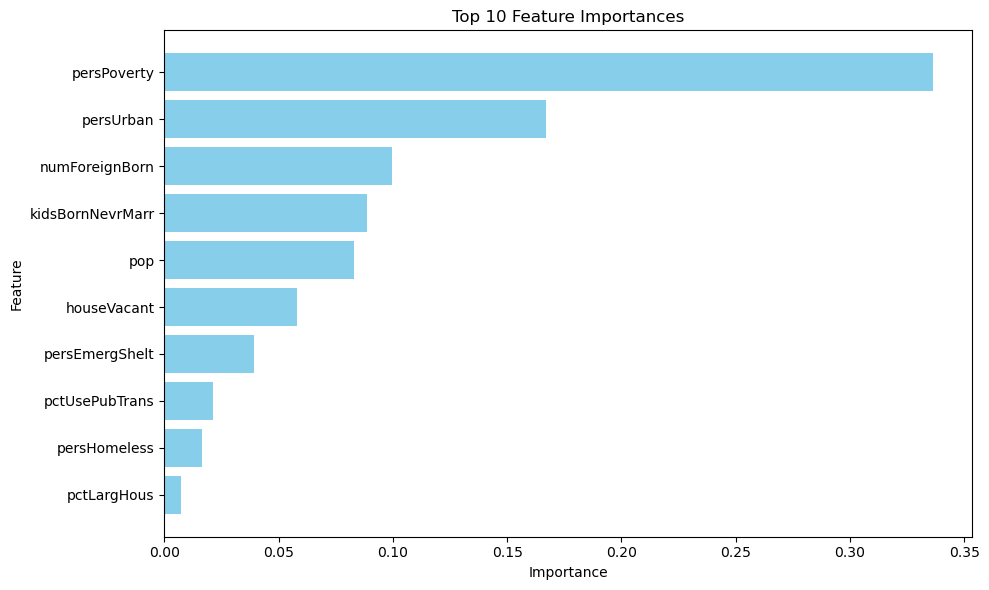

In [4]:
# Extract and display feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': df_feature.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 features
top_10_features = importance_df.head(10)
print("Top 10 Feature Importances:")
print(top_10_features)

# Visualize the top 10 feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.tight_layout()
plt.show()


# Select our first feature

In [5]:
selected_features = ['persPoverty']

# experimenting with random forest model

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Subset the dataset with selected features
X_selected = df_feature[selected_features]

# Step 3: Log-transform the target variable
y_log = np.log1p(df_target)  # Apply log(1 + y) transformation

# Step 4: Train-Test Split
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X_selected, y_log, test_size=0.2, random_state=42
)

# Feature scaling is not required for Random Forest

# Step 5: Train the Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_log)

# Step 6: Predict
y_pred_log = rf_model.predict(X_test)

# Inverse-transform predictions to the original scale
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)

# Step 7: Evaluate
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Testing Set Metrics using selected Features, and Log-Transformed Target with Random Forest:")
print(f"  - Mean Squared Error: {test_mse:.2f}")
print(f"  - R-squared: {test_r2:.2f}")


Testing Set Metrics using selected Features, and Log-Transformed Target with Random Forest:
  - Mean Squared Error: 511192.00
  - R-squared: 0.81


#  experimenting with svr model with only selected first variable

In [7]:
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Subset the dataset with selected features
X_selected = df_feature[selected_features]

# Step 3: Log-transform the target variable
y_log = np.log1p(df_target)  # Apply log(1 + y) transformation

# Step 4: Train-Test Split
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X_selected, y_log, test_size=0.2, random_state=42
)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train the SVR Model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_log)

# Step 7: Predict and Evaluate
y_pred_log = svr_model.predict(X_test_scaled)

# Inverse-transform predictions to the original scale
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)

# Calculate metrics on the original scale
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Testing Set Metrics using selected Scaled Features, and Log-Transformed Target with SVR:")
print(f"  - Mean Squared Error: {test_mse:.2f}")
print(f"  - R-squared: {test_r2:.2f}")


Testing Set Metrics using selected Scaled Features, and Log-Transformed Target with SVR:
  - Mean Squared Error: 572918.81
  - R-squared: 0.78


## experimenting with knn model with only the first select variable

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


# Subset the dataset with selected features
X_selected = df_feature[selected_features]

# Step 3: Log-transform the target variable
y_log = np.log1p(df_target)  # Apply log(1 + y) transformation

# Step 4: Train-Test Split
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X_selected, y_log, test_size=0.2, random_state=42
)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train the kNN Model
knn_model = KNeighborsRegressor(n_neighbors=5)  # Default n_neighbors=5
knn_model.fit(X_train_scaled, y_train_log)

# Step 7: Predict and Evaluate
y_pred_log = knn_model.predict(X_test_scaled)

# Inverse-transform predictions to the original scale
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)

# Calculate metrics on the original scale
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Testing Set Metrics using Lasso-Selected, Scaled Features, and Log-Transformed Target with kNN:")
print(f"  - Mean Squared Error: {test_mse:.2f}")
print(f"  - R-squared: {test_r2:.2f}")


Testing Set Metrics using Lasso-Selected, Scaled Features, and Log-Transformed Target with kNN:
  - Mean Squared Error: 524885.78
  - R-squared: 0.80


In [17]:
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Train ElasticNet for feature selection
elastic_net = ElasticNet(alpha=0.2, l1_ratio=0.5, random_state=42)  # Adjust alpha and l1_ratio as needed
elastic_net.fit(df_feature, df_target)

# Step 2: Select features with non-zero coefficients
selected_features = df_feature.columns[np.abs(elastic_net.coef_) > 1e-4]
print(f"Selected Features by ElasticNet: {list(selected_features)}")

# Subset the dataset with selected features
X_selected = df_feature[selected_features]

# Step 3: Log-transform the target variable
y_log = np.log1p(df_target)  # Apply log(1 + y) transformation

# Step 4: Train-Test Split
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X_selected, y_log, test_size=0.2, random_state=42
)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train the SVR Model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_log)

# Step 7: Predict and Evaluate
y_pred_log = svr_model.predict(X_test_scaled)

# Inverse-transform predictions to the original scale
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)

# Calculate metrics on the original scale
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Testing Set Metrics using ElasticNet-Selected, Scaled Features, and Log-Transformed Target with SVR:")
print(f"  - Mean Squared Error: {test_mse:.2f}")
print(f"  - R-squared: {test_r2:.2f}")



C:\Users\hyz20\miniconda3\envs\gpu-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.497e+08, tolerance: 7.625e+04
  model = cd_fast.enet_coordinate_descent(


Selected Features by ElasticNet: ['pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'persUrban', 'pctUrban', 'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'medFamIncome', 'perCapInc', 'whitePerCap', 'blackPerCap', 'NAperCap', 'asianPerCap', 'otherPerCap', 'hispPerCap', 'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'numForeignBorn', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'persPerOccupHous', 'pe